<a href="https://colab.research.google.com/github/Hamashyach/AnaliseDados_projeto1/blob/main/ProjetoMusicas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Músicas mais tocadas em 2024**

A base de dados Top Music 2024 é um conjunto de dados contemporâneo que reúne informações sobre as músicas mais populares de 2024 em diversas plataformas digitais, como Spotify, YouTube, TikTok, Apple Music, entre outras. Ela contém registros detalhados de métricas de engajamento, como número de execuções, visualizações, curtidas, presença em playlists e índices de popularidade. A base possui 4600 registros e 29 variáveis. Seu objetivo é permitir a análise de padrões que influenciam a popularidade musical e o impacto das redes sociais na difusão das faixas.

**Desafios de análise:**

* Identificar padrões musicais que impulsionam popularidade.

* Avaliar impacto de diferentes mídias sociais na divulgação de músicas.

* Analisar métricas de engajamento ao longo do tempo.


**Contexto Empresarial:**

* Esta base pode ser extremamente útil para gravadoras, plataformas de streaming, agências de marketing musical e artistas, pois permite:

* Identificar padrões que impulsionam o sucesso de uma faixa.

* Avaliar o impacto das redes sociais na popularidade das músicas.

* Apoiar decisões estratégicas de divulgação e investimento com base em dados reais de engajamento.


## **Dicionário das variáveis**

**Track Name:** Nome da música.

**Album Name:** Álbum.

**Artist:** Artista(s).

**Release Date:** Data de lançamento.

**ISRC:** Código internacional da faixa.

**All Time Rank:** Posição no ranking histórico.

**Track Score:** Nota atribuída à faixa.

**Spotify Streams:** Execuções no Spotify.

**Spotify Playlist Count:** Presença em playlists do Spotify.

**Spotify Playlist Reach:** Alcance nas playlists do Spotify.

**Spotify Popularity:** Popularidade no Spotify.

**YouTube Views:** Visualizações no YouTube.

**YouTube Likes:** Curtidas no YouTube.

**TikTok Posts:** Publicações no TikTok.

**TikTok Likes:** Curtidas no TikTok.

**TikTok Views:** Visualizações no TikTok.

**YouTube Playlist Reach:** Alcance nas playlists do YouTube.

**Apple Music Playlist Count:** Presença em playlists da Apple Music.

**AirPlay Spins:** Execuções em rádios.

**SiriusXM Spins:** Execuções na SiriusXM.

**Deezer Playlist Count:** Presença em playlists do Deezer.

**Deezer Playlist Reach:** Alcance nas playlists do Deezer.

**Amazon Playlist Count:** Presença em playlists da Amazon.

**Pandora Streams:** Execuções na Pandora.

**Pandora Track Stations:** Estações da Pandora com a faixa.

**Soundcloud Streams:** Execuções no SoundCloud.

**Shazam Counts:** Número de identficações no Shazam.

**TIDAL Popularity:** Popularidade no TIDAL.

**Explicit Track:** Contém conteúdo explícito (Sim/Não).














In [1]:
#pacotes necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [2]:
#importar o arquivo dos dados
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/05_músicas_mais_tocadas.csv', encoding='latin-1')
print("Formato da base (linhas, colunas): ", df.shape)

#Verificar os tipos de dados
print(f'\nOs tipos dos atributos são do tipo:\n{df.dtypes}')

# Visão geral
print("\nColunas disponíveis:")
print(df.columns.tolist())

print("\n10 Primeiras linhas da base:")
df.head(10)



Formato da base (linhas, colunas):  (4600, 29)

Os tipos dos atributos são do tipo:
Track                          object
Album Name                     object
Artist                         object
Release Date                   object
ISRC                           object
All Time Rank                  object
Track Score                   float64
Spotify Streams                object
Spotify Playlist Count         object
Spotify Playlist Reach         object
Spotify Popularity            float64
YouTube Views                  object
YouTube Likes                  object
TikTok Posts                   object
TikTok Likes                   object
TikTok Views                   object
YouTube Playlist Reach         object
Apple Music Playlist Count    float64
AirPlay Spins                  object
SiriusXM Spins                 object
Deezer Playlist Count         float64
Deezer Playlist Reach          object
Amazon Playlist Count         float64
Pandora Streams                object
Pand

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",...,684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",...,3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",NaN,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",...,536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",NaN,0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",...,"2,182",264.0,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",NaN,0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,"107,034,922","7,223","151,469,874",...,1,82.0,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",NaN,1
5,Lovin On Me,Lovin On Me,Jack Harlow,11/10/2023,USAT22311371,6,410.1,"670,665,438","105,892","175,421,034",...,"4,654",86.0,"17,167,254",152.0,"138,529,362","50,982","9,438,601","4,517,131",NaN,1
6,Beautiful Things,Beautiful Things,Benson Boone,1/18/2024,USWB12307016,7,407.2,"900,158,751","73,118","201,585,714",...,429,168.0,"48,197,850",154.0,"65,447,476","57,372",NaN,"9,990,302",NaN,0
7,Gata Only,Gata Only,FloyyMenor,2/2/2024,QZL382406049,8,375.8,"675,079,153","40,094","211,236,940",...,30,87.0,"33,245,595",53.0,"3,372,428","5,762",NaN,"6,063,523",NaN,1
8,Danza Kuduro - Cover,ýýýýýýýýýýýýýýýýýýýýý - ýýýýýýýýýýýýýýýýýý -,MUSIC LAB JPN,6/9/2024,TCJPA2463708,9,355.7,"1,653,018,119",1,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
9,BAND4BAND (feat. Lil Baby),BAND4BAND (feat. Lil Baby),Central Cee,5/23/2024,USSM12404354,10,330.6,"90,676,573","10,400","184,199,419",...,117,78.0,"10,800,098",92.0,"1,005,626",842,"3,679,709","666,302",NaN,1


De inicio notamos como o dataset é extenso e com muitas informações.



In [3]:
#Valores nulos ordenados em ordem decrescente
print("\nValores nulos por coluna:")
((df.isnull().sum() / df.shape[0])*100).sort_values(ascending=False)



Valores nulos por coluna:


,0
TIDAL Popularity,100.000000
Soundcloud Streams,72.456522
SiriusXM Spins,46.152174
Pandora Track Stations,27.565217
TikTok Posts,25.500000
Pandora Streams,24.043478
Amazon Playlist Count,22.934783
YouTube Playlist Reach,21.934783
TikTok Views,21.326087
TikTok Likes,21.304348


 Verificamos que existe muitos valores nulos, principalmente na váriável TIDAL Popularity que possui 100% de valores nulos, decidimos então remove-la por completo e fazer uma limpeza desses dados.

In [8]:
#Fazer uma cópia da base
df_limpo = df.copy()

# Faz uma cópia da base para limpeza
df_limpo = df.copy()

# Lista de colunas com números em formato de texto (com vírgula)
colunas_com_virgula = [
    'Spotify Streams', 'Spotify Playlist Reach', 'YouTube Views', 'YouTube Likes',
    'TikTok Posts', 'TikTok Likes', 'TikTok Views', 'YouTube Playlist Reach',
    'Deezer Playlist Reach', 'Pandora Streams', 'Soundcloud Streams', 'Shazam Counts'
]

# Converte colunas com vírgulas para float
for col in colunas_com_virgula:
    if col in df_limpo.columns:
        df_limpo[col] = df_limpo[col].astype(str).str.replace(',', '')
        df_limpo[col] = pd.to_numeric(df_limpo[col], errors='coerce')

# Converte a coluna de data
df_limpo['Release Date'] = pd.to_datetime(df_limpo['Release Date'], errors='coerce')

# Converte valores binários para 'Sim' e 'Não'
df_limpo['Explicit Track'] = df_limpo['Explicit Track'].map({0: 'Não', 1: 'Sim'})

# Remove colunas desnecessárias
df_limpo.drop(columns=['TIDAL Popularity', 'ISRC'], inplace=True)

# Remove linhas com muitos valores nulos
df_limpo = df_limpo[df_limpo.isnull().sum(axis=1) < 10]

# Remove duplicatas
linhas_antes = df_limpo.shape[0]
df_limpo.drop_duplicates(inplace=True)
linhas_depois = df_limpo.shape[0]
if linhas_depois < linhas_antes:
    print(f"{linhas_antes - linhas_depois} linhas duplicadas foram removidas.")
else:
    print("Nenhuma linha duplicada foi encontrada ou removida.")

# Visualiza o tamanho final e as primeiras linhas
print("Base após limpeza:", df_limpo.shape)
display(df_limpo.head(10))


2 linhas duplicadas foram removidas.
Base após limpeza: (4028, 27)


,Track,Album Name,Artist,Release Date,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,...,AirPlay Spins,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,2024-04-26,1,725.4,3.904709e+08,"30,716",196631588.0,92.0,...,"40,975",684,62.0,17598718.0,114.0,18004655.0,"22,931",4818457.0,2669262.0,Não
1,Not Like Us,Not Like Us,Kendrick Lamar,2024-05-04,2,545.9,3.237039e+08,"28,113",174597137.0,92.0,...,"40,778",3,67.0,10422430.0,111.0,7780028.0,"28,444",6623075.0,1118279.0,Sim
2,i like the way you kiss me,I like the way you kiss me,Artemas,2024-03-19,3,538.4,6.013093e+08,"54,331",211607669.0,92.0,...,"74,333",536,136.0,36321847.0,172.0,5022621.0,"5,639",7208651.0,5285340.0,Não
3,Flowers,Flowers - Single,Miley Cyrus,2023-01-12,4,444.9,2.031281e+09,"269,802",136569078.0,85.0,...,"1,474,799","2,182",264.0,24684248.0,210.0,190260277.0,"203,384",NaN,11822942.0,Não
4,Houdini,Houdini,Eminem,2024-05-31,5,423.3,1.070349e+08,"7,223",151469874.0,88.0,...,"12,185",1,82.0,17660624.0,105.0,4493884.0,"7,006",207179.0,457017.0,Sim
5,Lovin On Me,Lovin On Me,Jack Harlow,2023-11-10,6,410.1,6.706654e+08,"105,892",175421034.0,83.0,...,"522,042","4,654",86.0,17167254.0,152.0,138529362.0,"50,982",9438601.0,4517131.0,Sim
6,Beautiful Things,Beautiful Things,Benson Boone,2024-01-18,7,407.2,9.001588e+08,"73,118",201585714.0,86.0,...,"383,478",429,168.0,48197850.0,154.0,65447476.0,"57,372",NaN,9990302.0,Não
7,Gata Only,Gata Only,FloyyMenor,2024-02-02,8,375.8,6.750792e+08,"40,094",211236940.0,92.0,...,"17,221",30,87.0,33245595.0,53.0,3372428.0,"5,762",NaN,6063523.0,Sim
9,BAND4BAND (feat. Lil Baby),BAND4BAND (feat. Lil Baby),Central Cee,2024-05-23,10,330.6,9.067657e+07,"10,400",184199419.0,86.0,...,"3,823",117,78.0,10800098.0,92.0,1005626.0,842,3679709.0,666302.0,Sim
10,I Had Some Help (feat. Morgan Wallen),I Had Some Help,Post Malone,2024-05-10,11,322.1,2.500804e+08,"16,219",168766158.0,91.0,...,"62,312",71,60.0,12009073.0,114.0,23155471.0,"21,172",1594605.0,963413.0,Sim


**Limpeza**


*  Fizemos uma cópia da tabela de dados para não alterar a tabela original

*    Removemos a coluna TIDAL Popularity e coluna ISRC

* Convertemos valores que eram object(por conta da virgula) em float.

* Garantimos que as datas de lançamento está do tipo data

*  Remove linhas com uma quantidade muito grande de nulos

* Remove linhas duplicadas

* Visualizar a base limpa




In [5]:
#Descrição estatísticas dos dados
df_limpo.describe()

,Release Date,Track Score,Spotify Streams,Spotify Playlist Reach,Spotify Popularity,YouTube Views,YouTube Likes,TikTok Posts,TikTok Likes,TikTok Views,YouTube Playlist Reach,Apple Music Playlist Count,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Soundcloud Streams,Shazam Counts
count,4028,4028.000000,4.024000e+03,4.028000e+03,3603.000000,3.949000e+03,3.946000e+03,3.318000e+03,3.501000e+03,3.500000e+03,3.446000e+03,3887.000000,3625.000000,3.618000e+03,3464.000000,3.420000e+03,1.243000e+03,3.778000e+03
mean,2020-11-11 08:51:35.928500736,41.759037,4.615664e+08,2.605772e+07,65.287538,3.862069e+08,2.935118e+06,8.736788e+05,1.121031e+08,1.148809e+09,3.421557e+08,55.884744,32.709517,1.301267e+06,25.721420,8.536090e+07,1.457425e+07,2.512438e+06
min,1987-07-21 00:00:00,19.400000,4.522000e+03,2.900000e+01,1.000000,9.130000e+02,2.500000e+01,1.000000e+00,3.000000e+00,1.900000e+01,1.000000e+00,1.000000,1.000000,1.000000e+00,1.000000,2.000000e+00,1.800000e+01,7.500000e+01
25%,2019-04-18 00:00:00,23.500000,9.283001e+07,7.053215e+06,62.000000,4.093895e+07,4.278695e+05,3.763250e+04,5.979412e+06,5.944088e+07,1.154156e+07,11.000000,5.000000,5.425225e+04,8.000000,1.084318e+06,7.899425e+05,2.861968e+05
50%,2022-03-07 00:00:00,30.000000,2.616871e+08,1.568796e+07,67.000000,1.447743e+08,1.285850e+06,1.733990e+05,2.705406e+07,2.659906e+08,9.387865e+07,29.000000,15.000000,2.392015e+05,18.000000,1.273577e+07,3.308660e+06,9.572035e+05
75%,2023-07-12 06:00:00,44.700000,6.478156e+08,3.280956e+07,73.000000,4.501212e+08,3.591284e+06,7.304260e+05,9.436800e+07,9.068123e+08,3.059424e+08,72.000000,38.000000,9.074285e+05,35.000000,8.054493e+07,1.337581e+07,2.867504e+06
max,2024-06-12 00:00:00,725.400000,4.281469e+09,2.623434e+08,96.000000,1.632276e+10,6.231118e+07,3.772646e+07,2.347422e+10,2.332323e+11,7.289707e+09,859.000000,632.000000,4.819785e+07,210.000000,1.463624e+09,3.198359e+08,4.484264e+07
std,NaN,38.235171,5.252015e+08,3.031802e+07,13.521407,6.839873e+08,4.603147e+06,2.275158e+06,5.534820e+08,5.929012e+09,6.751231e+08,72.248931,54.571568,3.571106e+06,26.102024,1.675487e+08,3.132903e+07,4.050168e+06


**Análise Estatística Descritiva**

* A popularidade no Spotify apresenta média elevada (65), indicando que as músicas analisadas tem maior alcance na plataforma. A dispersão é moderada (desvio padrão ≈13), o que sugere consistência entre os valores, com poucos extremos.

* As variáveis relacionadas a playlists Apple Music, Deezer, Amazon mostram alta assimetria: poucas músicas aparecem em muitas playlists, enquanto a maioria tem participação limitada. Isso evidencia uma distribuição desigual de visibilidade nessas plataformas.

* O Track Score revela forte concentração de destaque em poucas faixas. A média está em 41, mas há músicas com pontuação acima de 700, o que demonstra que poucas músicas dominam amplamente os rankings.

* A variabilidade entre as plataformas é significativa. Enquanto músicas no YouTube alcançam bilhões de visualizações, outras plataformas como Deezer e Amazon possuem alcances bem mais modestos, sugerindo que certas mídias favorecem artistas ou gêneros específicos.

* Além disso, a presença de outliers elevados (sobretudo em visualizações e streams) afeta a média geral e mostra que algumas faixas se tornam fenômenos virais, principalmente no YouTube, TikTok e Soundcloud.

5. Tipo de distribuição

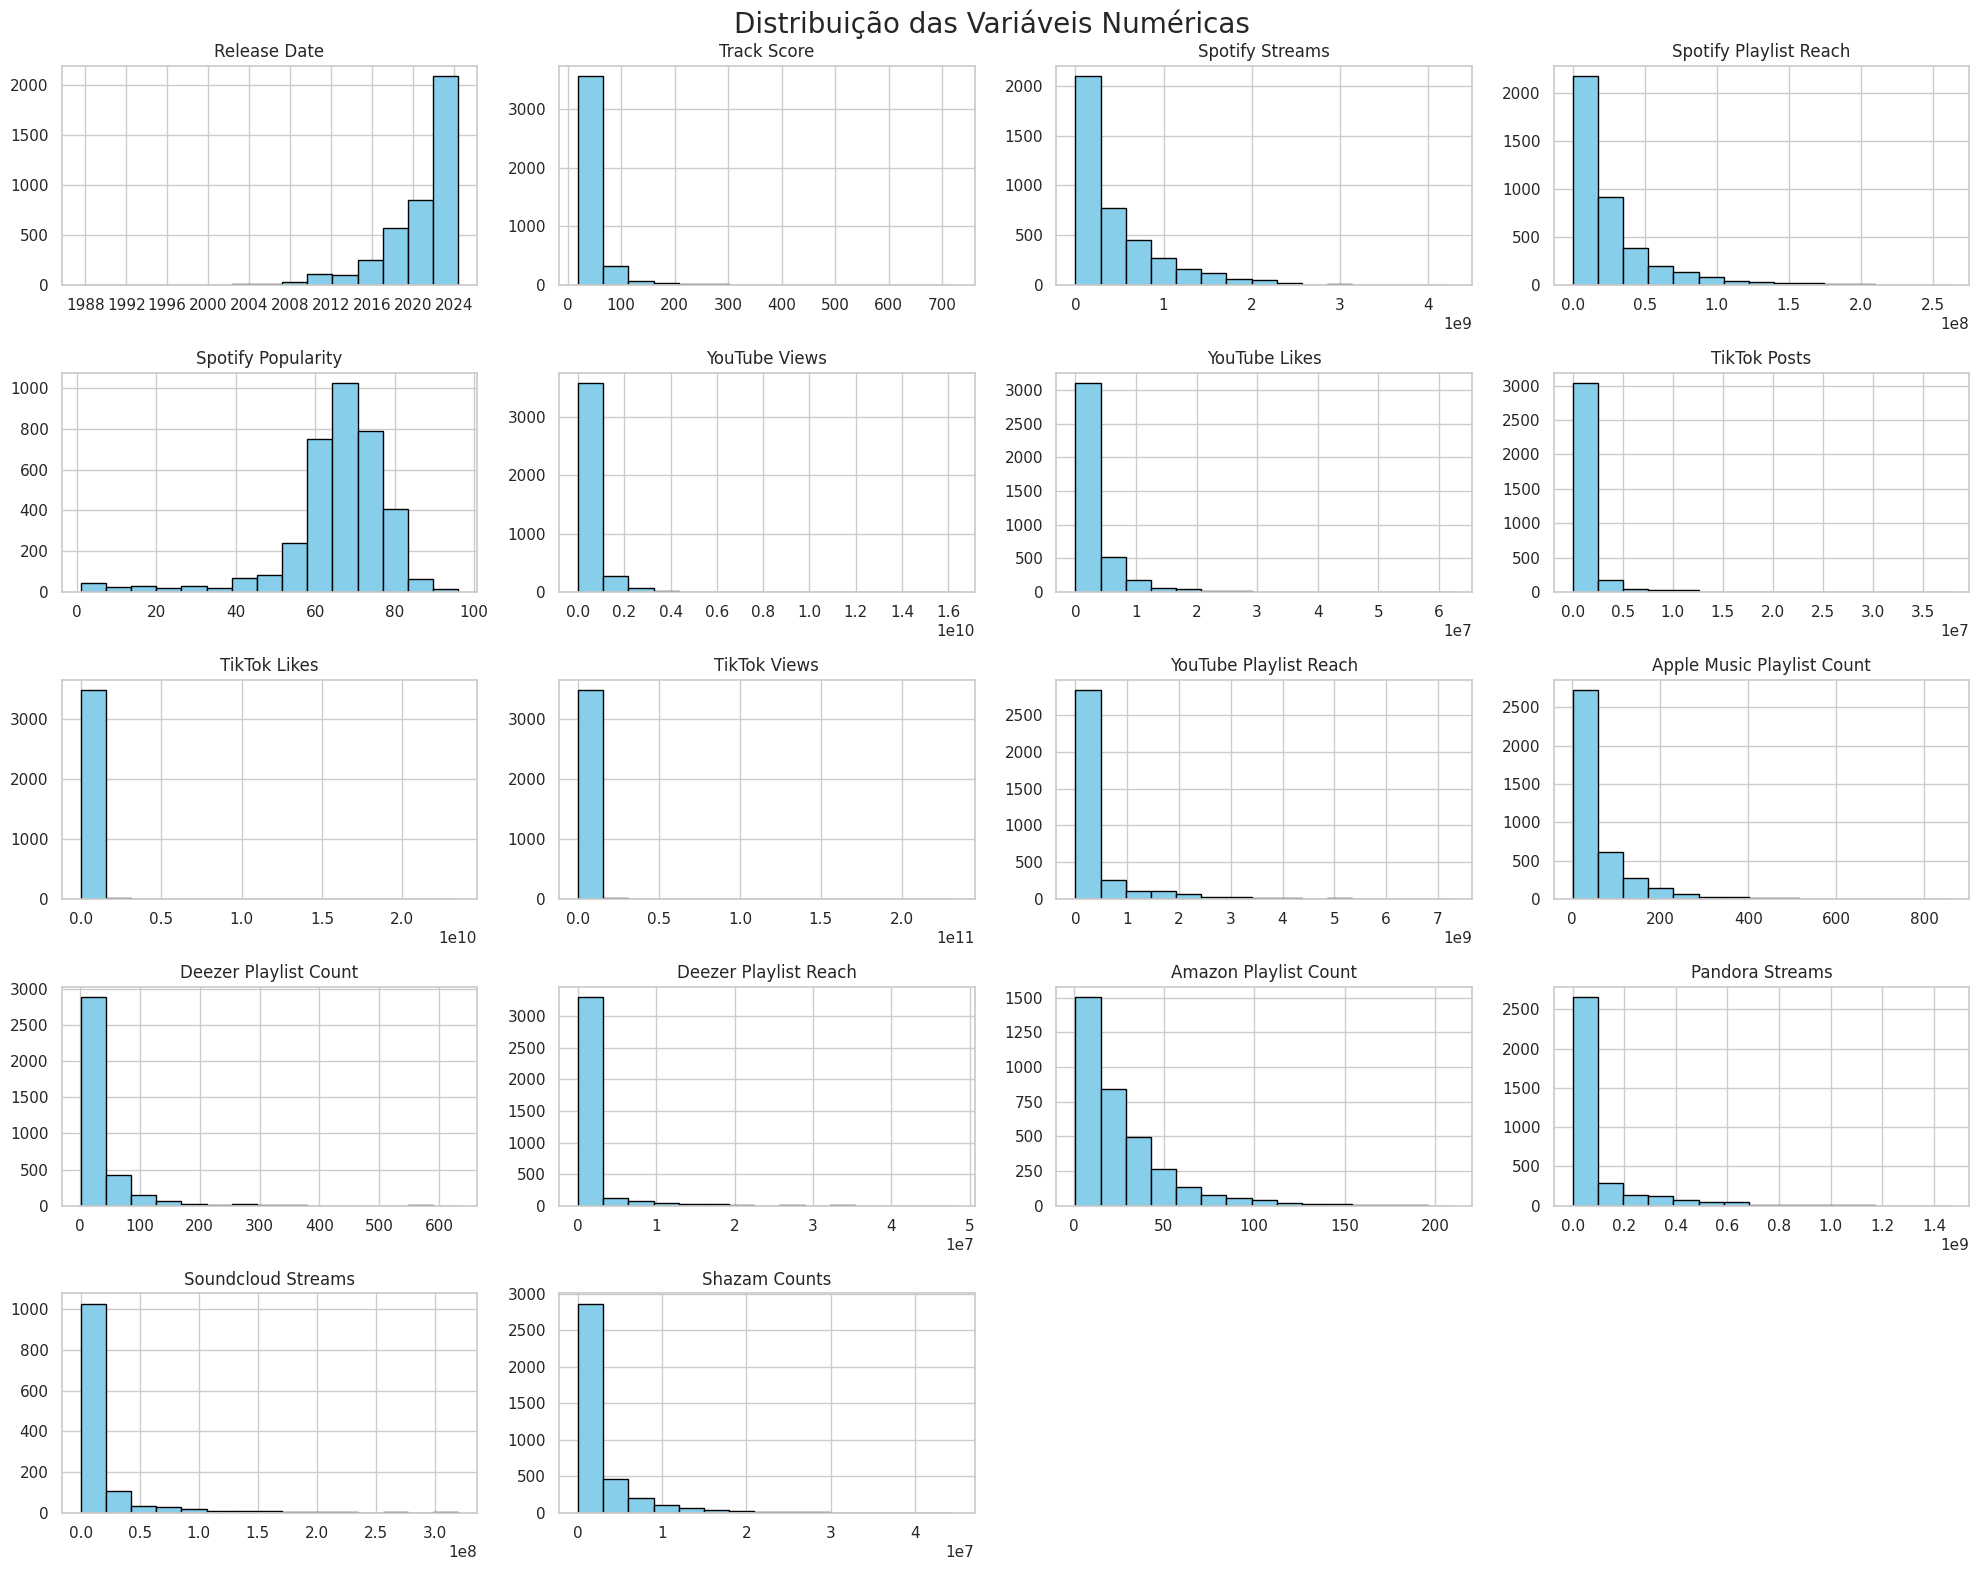

In [6]:
# Ajuste do estilo dos gráficos
sns.set_theme(style="whitegrid", palette='rocket')

# Gera todos os histogramas de colunas numéricas do df_limpo
df_limpo.hist(bins=15, figsize=(20, 16), color='skyblue', edgecolor='black')
plt.suptitle('Distribuição das Variáveis Numéricas', fontsize=20)
plt.tight_layout()
plt.show()

**Análise dos Histogramas**

* Notamos que alguns dos histogramas revelam distribuições assimétricas à direita em grande parte dos dados, como Spotify Streams, TikTok Views e Youtube Views. Isso significa que a maioria das músicas apresentam valores baixos, enquanto poucas faixas obtêm valores muito altos (hits virais).

* Já no Spotify Popularty podemos notar uma distribuição mais concentrada em faixas médias-altas, o que indica que muitas músicas são bem avaliadas ou populares dentrode um padrão esperado. Enquanto os histogramas como Souncloud Streams e Amazon playlist Count a distribuição dos dados é mais irregular. Isso mostra que nem todas as músicas estão presentes ou têm o mesmo destaque nessas mídias.

* De forma geral, os gráficos mostram um padrão comum do consumo digital: poucas músicas ganham muita atenção e a maioria tem um desempenho mais discreto, um reflexo do funcionamento dos algoritmos e da viralização nas redes.

# 5.1 Medidas de tendência central e dispersão

**5.1.1 Qual a média de alcance musical de cada plataforma?**

Média de Alcance das Músicas por Plataforma:
TikTok Views                  1.148809e+09
YouTube Playlist Reach        3.421557e+08
Pandora Streams               8.536090e+07
Spotify Playlist Reach        2.605772e+07
Soundcloud Streams            1.457425e+07
Deezer Playlist Reach         1.301267e+06
Apple Music Playlist Count    5.588474e+01
Amazon Playlist Count         2.572142e+01
dtype: float64


<ipython-input-9-4cf39a4bf603>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=alcance_media.values, y=alcance_media.index, palette="viridis")


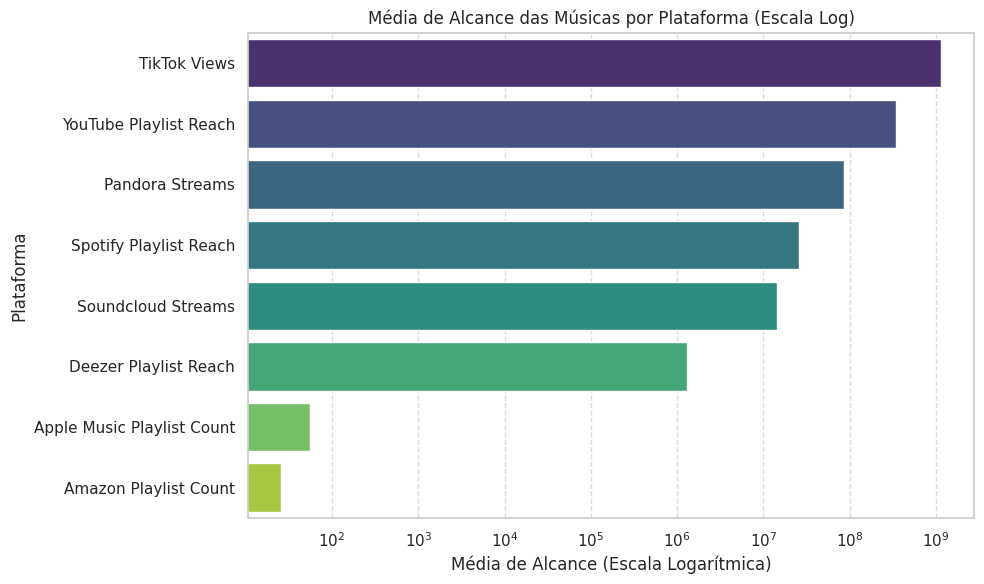

In [9]:
# Lista de colunas que representam alcance em diferentes plataformas
colunas_alcance = [
    'Spotify Playlist Reach',
    'YouTube Playlist Reach',
    'TikTok Views',
    'Apple Music Playlist Count',
    'Deezer Playlist Reach',
    'Amazon Playlist Count',
    'Pandora Streams',
    'Soundcloud Streams'
]

# Garante que as colunas estão presentes e numéricas
alcance_media = df_limpo[colunas_alcance].mean().dropna().sort_values(ascending=False)

# Exibe as médias
print("Média de Alcance das Músicas por Plataforma:")
print(alcance_media)

# Gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=alcance_media.values, y=alcance_media.index, palette="viridis")
plt.xscale('log')
plt.xlabel("Média de Alcance (Escala Logarítmica)")
plt.ylabel("Plataforma")
plt.title("Média de Alcance das Músicas por Plataforma (Escala Log)")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Análise Estatística Descritiva do Alcance por Plataforma**

* O TikTok domina o alcance, com uma média de 1,15 bilhão de visualizações, o que indica a forte influência dessa olataforma na viralização de músicas.

* YouTube Playlist Reach aparece em segundo lugar com 342 milhões, destacando-se como uma das principais plataformas de descoberta e consumo musical em massa.

* Apesar do Spotify estar em quarto lugar, com uma média de 26 milhões, ele ainda é muito relevante por sua presença em playlists curadas, o que imapacta na descoberta de faixas.

* Já a Apple Music e Amanzon Playlist tem médias muito baixas o que pode ser causado por possuir poucos usuários com playlists publicas.

**5.1.2 Mediana e Desvio Padrão por Plataforma**





In [10]:
# Calcula a mediana
mediana_alcance = df_limpo[colunas_alcance].median().dropna().sort_values(ascending=False)

# Calcula o desvio padrão
desvio_padrao_alcance = df_limpo[colunas_alcance].std().dropna().sort_values(ascending=False)

# Exibe os resultados
print("📊 Mediana de Alcance por Plataforma:")
print(mediana_alcance)

print("\n📈 Desvio Padrão de Alcance por Plataforma:")
print(desvio_padrao_alcance)

📊 Mediana de Alcance por Plataforma:
TikTok Views                  265990638.5
YouTube Playlist Reach         93878654.5
Spotify Playlist Reach         15687960.5
Pandora Streams                12735768.5
Soundcloud Streams              3308660.0
Deezer Playlist Reach            239201.5
Apple Music Playlist Count           29.0
Amazon Playlist Count                18.0
dtype: float64

📈 Desvio Padrão de Alcance por Plataforma:
TikTok Views                  5.929012e+09
YouTube Playlist Reach        6.751231e+08
Pandora Streams               1.675487e+08
Soundcloud Streams            3.132903e+07
Spotify Playlist Reach        3.031802e+07
Deezer Playlist Reach         3.571106e+06
Apple Music Playlist Count    7.224893e+01
Amazon Playlist Count         2.610202e+01
dtype: float64


* TikTok e YouTube: Altíssima média e desvio padrão — poucas músicas explodem, a maioria tem alcance baixo.

* Spotify e Pandora: Também são desiguais, mas menos extremos.

* SoundCloud e Deezer: Alcance mais modesto, ainda com forte variação.

* Apple e Amazon: Distribuição mais estável, com menor alcance e menor desigualdade.

**5.1.3 Gráfico de Dispersão (Boxplot) e Análise de Outliers**

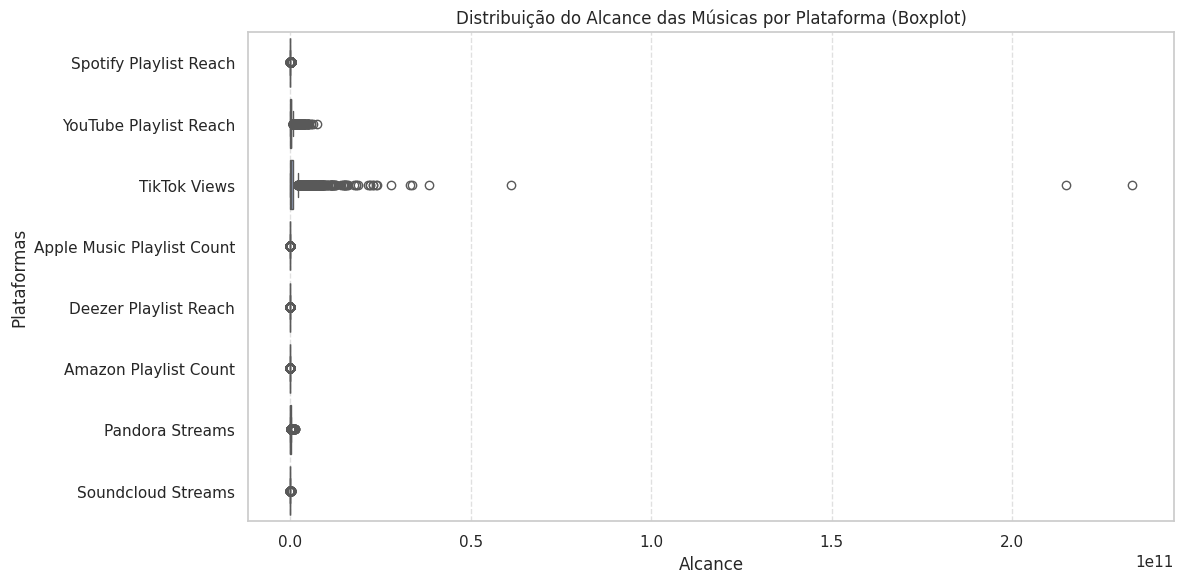

In [11]:
# Boxplot para alcance nas plataformas
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_limpo[colunas_alcance], orient='h', palette='Set2')
plt.title("Distribuição do Alcance das Músicas por Plataforma (Boxplot)")
plt.xlabel("Alcance")
plt.ylabel("Plataformas")
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


**Análise de Outliers com Boxplots**

* TikTok Views: Extremamente assimétrico. Muitos outliers com valores altíssimos indicam que poucas músicas viralizam fortemente, enquanto a maioria tem alcance mediano ou baixo.

* YouTube Playlist Reach e Spotify Playlist Reach: Também mostram assimetria, com outliers relevantes — evidenciando que poucas faixas são impulsionadas por grandes playlists.

* Pandora e SoundCloud Streams: Alta dispersão e presença de outliers, mas menos extremos do que TikTok.

* Deezer, Apple Music e Amazon: Alcance mais concentrado, com poucos ou nenhum outlier. Isso indica distribuição mais homogênea e limitada em alcance.

5.1.4 Removendo Outliers

In [12]:
#Verificando Outliers
for col in colunas_alcance:
    serie = df_limpo[col].dropna()  # remove nulos
    Q1 = serie.quantile(0.25)
    Q3 = serie.quantile(0.75)
    IQR = Q3 - Q1
    outliers = serie[(serie < Q1 - 1.5 * IQR) | (serie > Q3 + 1.5 * IQR)]
    print(f'{col}: {len(outliers)} outliers')

Spotify Playlist Reach: 333 outliers
YouTube Playlist Reach: 413 outliers
TikTok Views: 403 outliers
Apple Music Playlist Count: 300 outliers
Deezer Playlist Reach: 424 outliers
Amazon Playlist Count: 200 outliers
Pandora Streams: 466 outliers
Soundcloud Streams: 149 outliers


In [15]:
#Fazemos uma cópia para não alterar o original
df_sem_outliers = df_limpo.copy()

# Remoção de outliers com base no IQR
for col in colunas_alcance:
    Q1 = df_sem_outliers[col].quantile(0.25)
    Q3 = df_sem_outliers[col].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Mantem apenas os dados dentro dos limites
    df_sem_outliers = df_sem_outliers[
        (df_sem_outliers[col] >= limite_inferior) & (df_sem_outliers[col] <= limite_superior)
    ]

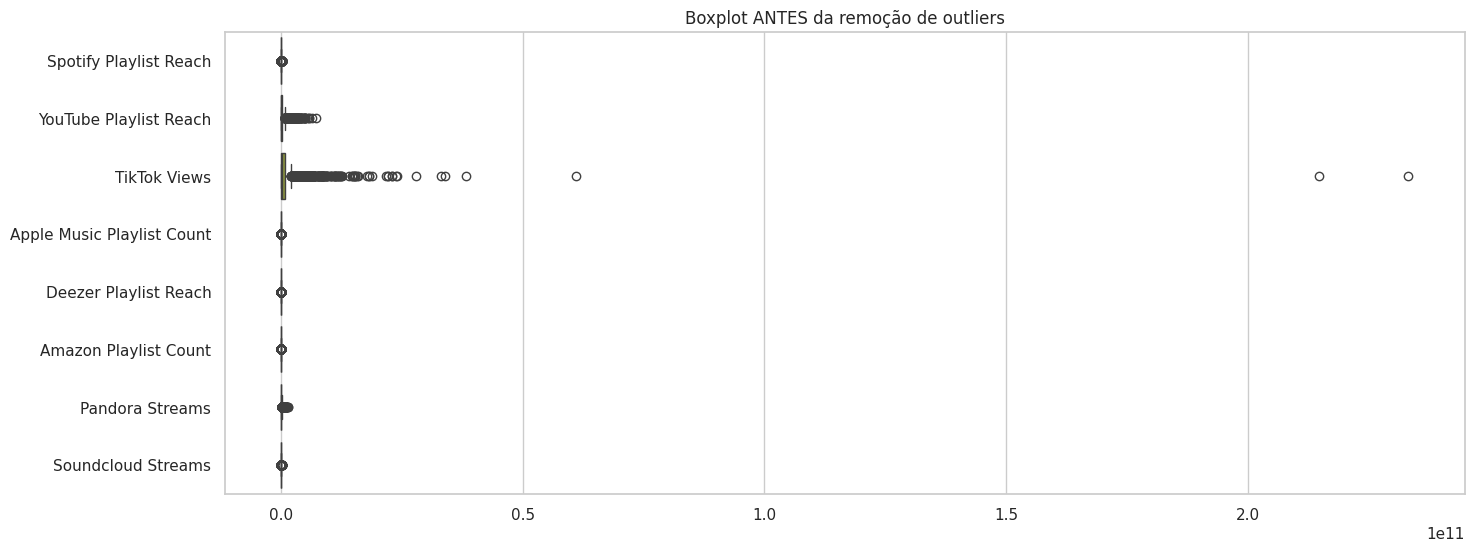

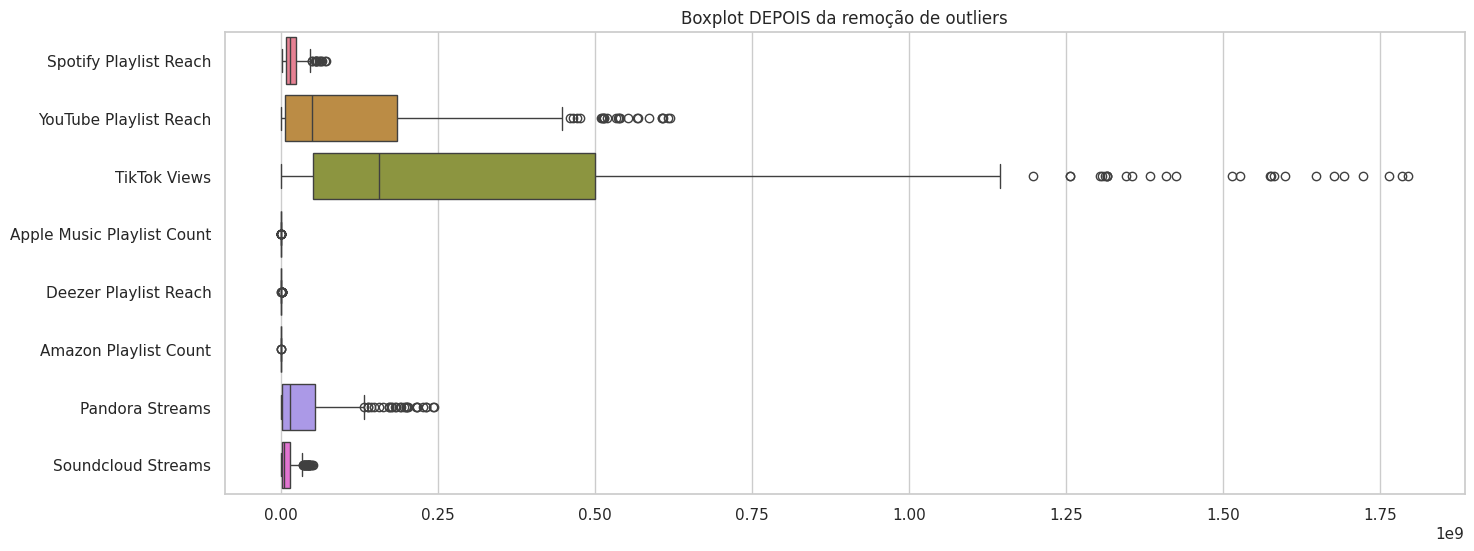

In [16]:
# Boxplot antes da remoção de outliers
plt.figure(figsize=(16, 6))
sns.boxplot(data=df_limpo[colunas_alcance], orient='h')
plt.title('Boxplot ANTES da remoção de outliers')
plt.show()

# Boxplot depois da remoção de outliers
plt.figure(figsize=(16, 6))
sns.boxplot(data=df_sem_outliers[colunas_alcance], orient='h')
plt.title('Boxplot DEPOIS da remoção de outliers')
plt.show()

In [17]:
# 1. Quantidade de dados antes e depois
print(f"Nº de registros ANTES da remoção de outliers: {df_limpo.shape[0]}")
print(f"Nº de registros DEPOIS da remoção de outliers: {df_sem_outliers.shape[0]}")
print(f"Nº de registros REMOVIDOS: {df_limpo.shape[0] - df_sem_outliers.shape[0]}\n")

# 2. Estatísticas descritivas para comparação
print("📊 Estatísticas ANTES da remoção de outliers:")
display(df_limpo[colunas_alcance].describe().T)

print("\n📊 Estatísticas DEPOIS da remoção de outliers:")
display(df_sem_outliers[colunas_alcance].describe().T)

Nº de registros ANTES da remoção de outliers: 4028
Nº de registros DEPOIS da remoção de outliers: 341
Nº de registros REMOVIDOS: 3687

📊 Estatísticas ANTES da remoção de outliers:


,count,mean,std,min,25%,50%,75%,max
Spotify Playlist Reach,4028.0,2.605772e+07,3.031802e+07,29.0,7053215.00,15687960.5,3.280956e+07,2.623434e+08
YouTube Playlist Reach,3446.0,3.421557e+08,6.751231e+08,1.0,11541556.25,93878654.5,3.059424e+08,7.289707e+09
TikTok Views,3500.0,1.148809e+09,5.929012e+09,19.0,59440875.75,265990638.5,9.068123e+08,2.332323e+11
Apple Music Playlist Count,3887.0,5.588474e+01,7.224893e+01,1.0,11.00,29.0,7.200000e+01,8.590000e+02
Deezer Playlist Reach,3618.0,1.301267e+06,3.571106e+06,1.0,54252.25,239201.5,9.074285e+05,4.819785e+07
Amazon Playlist Count,3464.0,2.572142e+01,2.610202e+01,1.0,8.00,18.0,3.500000e+01,2.100000e+02
Pandora Streams,3420.0,8.536090e+07,1.675487e+08,2.0,1084317.50,12735768.5,8.054493e+07,1.463624e+09
Soundcloud Streams,1243.0,1.457425e+07,3.132903e+07,18.0,789942.50,3308660.0,1.337581e+07,3.198359e+08



📊 Estatísticas DEPOIS da remoção de outliers:


,count,mean,std,min,25%,50%,75%,max
Spotify Playlist Reach,341.0,1.801414e+07,1.307923e+07,1222888.0,7954524.0,15063771.0,24096906.0,7.136634e+07
YouTube Playlist Reach,341.0,1.217102e+08,1.552442e+08,182.0,7025105.0,49818215.0,185360520.0,6.186372e+08
TikTok Views,341.0,3.557770e+08,4.330157e+08,1420.0,51520600.0,155757311.0,500108092.0,1.794130e+09
Apple Music Playlist Count,341.0,3.995015e+01,2.954549e+01,2.0,18.0,32.0,53.0,1.330000e+02
Deezer Playlist Reach,341.0,2.309519e+05,2.429957e+05,54.0,41140.0,143492.0,347762.0,1.040628e+06
Amazon Playlist Count,341.0,1.658358e+01,1.175246e+01,1.0,7.0,14.0,23.0,4.900000e+01
Pandora Streams,341.0,3.913374e+07,5.525052e+07,3.0,1790458.0,14217098.0,54177152.0,2.440846e+08
Soundcloud Streams,341.0,9.630114e+06,1.190637e+07,2887.0,1367844.0,4254609.0,14784764.0,5.073752e+07


**Comparação dos Boxplots com e sem Outliers**

* Ao fazer a remoção dos outliers podemos ver que foram removidos 3.687 registros, essa remoção afetou significamente a média e o desvio padrão de todas as plataformas, reduzindo de forma drastica os valores.

* As Plataformas como TikTok e Youtube apresentam outliers muito altos, o que indica a existencia de músicas consideradas(virais).

* Por conta dessa diferença, optei por manter os outliers na análise, uma vez que refletem um comportamento real na indústria musical.

#6.Matriz de Correlação entre variáveis numéricas

**6.1 Matriz de Correlação com heatmap**

<ipython-input-18-9a2e938854f2>:11: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


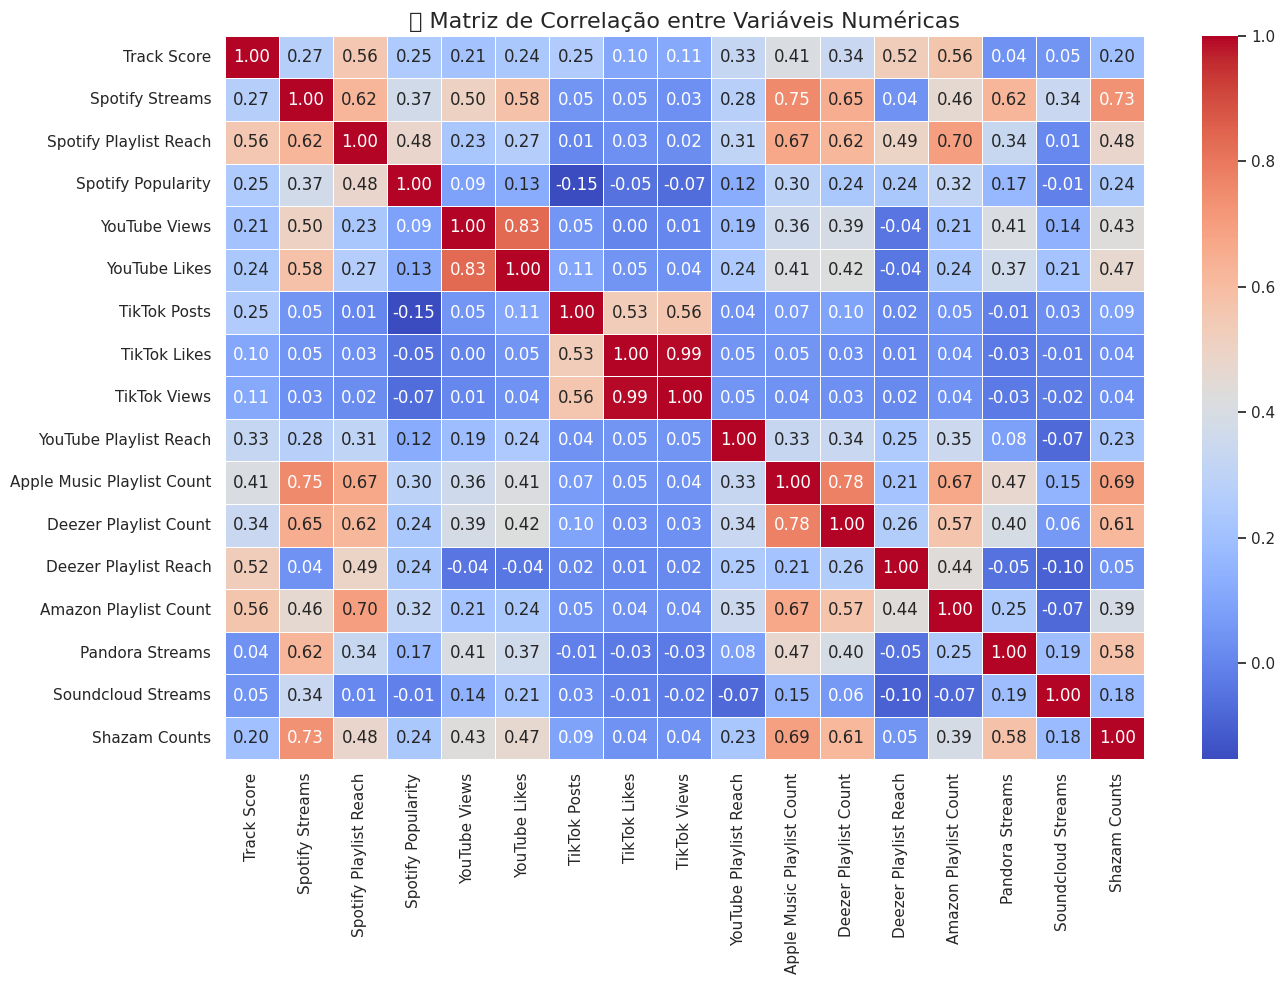

In [18]:
# Calcula a matriz de correlação das variáveis numéricas
matriz_corr = df_limpo.corr(numeric_only=True)

plt.figure(figsize=(14, 10))

# Heatmap
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title("🔗 Matriz de Correlação entre Variáveis Numéricas", fontsize=16)
plt.tight_layout()

* Podemos ver que TikTok, posts, likes e viewns possuem alta correlação entre sim (até 0.99), o que indica que as músicas com mais postagens também tendem a ter mais curtidas e visualizações no TikTok.

* O Youtube views e likes, também possuem uma correlação forte, já que videos mais vistos tendem a ter mais curtidas.

* Já o Soundcloud Streams, Shazam Counts e Pandora Streams possuem correlação fraca com a maioria das outras variáveis. Isso pode sugerir um comportamento de consumo mais independente nessas plataformas, ou então uma base de usuários distinta.
